In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [4]:
bins = 1000
lat_min, lat_max = 41.04961, 41.24961
lon_min, lon_max = -8.71099, -8.51099

In [5]:
data = pd.read_csv('./data/train.csv',
                       chunksize=100000,      
                       usecols=['POLYLINE'],
                       converters={'POLYLINE': lambda x: json.loads(x)})

In [11]:
len(np.unique(data['TAXI_ID']))

448

In [4]:
# process data in chunks to avoid using too much memory
z = np.zeros((bins, bins))
for chunk in data:
    latlon = np.array([(lat, lon) 
                        for path in chunk.POLYLINE
                        for lon, lat in path if len(path) > 0])
    print(chunk, latlon)
    z += np.histogram2d(*latlon.T, bins=bins, 
                        range=[[lat_min, lat_max],
                                [lon_min, lon_max]])[0]

                                                POLYLINE
0      [[-8.618643, 41.141412], [-8.618499, 41.141376...
1      [[-8.639847, 41.159826], [-8.640351, 41.159871...
2      [[-8.612964, 41.140359], [-8.613378, 41.14035]...
3      [[-8.574678, 41.151951], [-8.574705, 41.151942...
4      [[-8.645994, 41.18049], [-8.645949, 41.180517]...
5      [[-8.615502, 41.140674], [-8.614854, 41.140926...
6      [[-8.57952, 41.145948], [-8.580942, 41.145039]...
7      [[-8.617563, 41.146182], [-8.617527, 41.145849...
8      [[-8.611794, 41.140557], [-8.611785, 41.140575...
9      [[-8.615907, 41.140557], [-8.614449, 41.141088...
10     [[-8.619894, 41.148009], [-8.620164, 41.14773]...
11     [[-8.56242, 41.168403], [-8.562429, 41.168358]...
12     [[-8.618868, 41.155101], [-8.6175, 41.154912],...
13     [[-8.608716, 41.153499], [-8.607627, 41.153481...
14     [[-8.612208, 41.14053], [-8.612235, 41.140521]...
15     [[-8.585145, 41.164857], [-8.584146, 41.164704...
16     [[-8.584263, 41.163156],

In [5]:
log_density = np.log(20 + z)

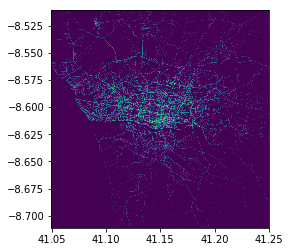

In [6]:
plt.imshow(log_density[::-1,:], # flip vertically
           extent=[lat_min, lat_max, lon_min, lon_max])
plt.savefig('heatmap_test.png', figsize=(8, 6), dpi=1000)

In [7]:
test = pd.read_csv('./data/train.csv')

In [8]:
export_test = test.head(10000)
export_test.to_csv('data/test.csv')

In [163]:
data = pd.read_csv('./data/test.csv',
                       chunksize=1000,      
                       usecols=['POLYLINE'],
                       converters={'POLYLINE': lambda x: json.loads(x)})
input_data = [path for chunk in data for path in chunk.POLYLINE]

In [164]:
input_data = np.array(input_data)
max_len = max([np.array(i).shape[0] for i in input_data])
for i in range(len(input_data)):
    a = np.array(input_data[i])
    a = a.reshape(a.shape[0], 2)
    b = np.array([np.zeros(max_len - len(input_data[i]))])
    b = np.concatenate((b, b), axis=0)
    b = b.reshape(b.shape[1], 2)
    input_data[i] = np.concatenate((a, b), axis=0)

In [170]:
input_data.shape

(10000,)

In [174]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable